In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from pandas.plotting import table

# Study data files
mouse_metadata_path = "mouse_metadata.csv"
study_results_path = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
num_of_mice = combined_df["Mouse ID"].nunique()
num_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first"), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep="first")]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


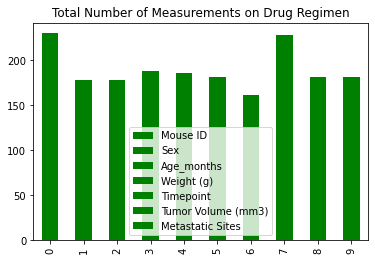

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_reg_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
drug_reg_df = drug_reg_data[["Drug Regimen", "Mouse ID"]]

drug_reg_data.plot(kind="bar", facecolor="green")
plt.title("Total Number of Measurements on Drug Regimen")
plt.show()

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_mice = gender_mice[["Sex","Mouse ID"]]
gender_mice

,Sex,Mouse ID
0,Female,935
1,Male,958


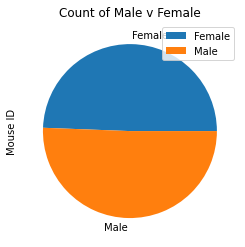

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_pie = gender_mice.plot(kind="pie", y="Mouse ID", labels=gender_mice["Sex"])
plt.title("Count of Male v Female")
plt.show()

Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor = final_tumor.reset_index()

final_data = final_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how="left")
final_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,0,Infubinol,Female,20,23,45.0,0
1,a251,0,Infubinol,Female,21,25,45.0,0
2,a262,0,Placebo,Female,17,29,45.0,0
3,a275,0,Ceftamin,Female,20,28,45.0,0
4,a366,0,Stelasyn,Female,16,29,45.0,0


In [11]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol_data = final_data.loc[final_data["Drug Regimen"] == drugs, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of tumors is: {lowerq}")
print(f"The upper quartile of tumors is: {upperq}")
print(f"The interquartile range of tumors is: {iqr}")
print(f"The the median of tumors is: {quartiles[0.5]} ")

The lower quartile of tumors is: 45.0
The upper quartile of tumors is: 45.0
The interquartile range of tumors is: 0.0
The the median of tumors is: 45.0 


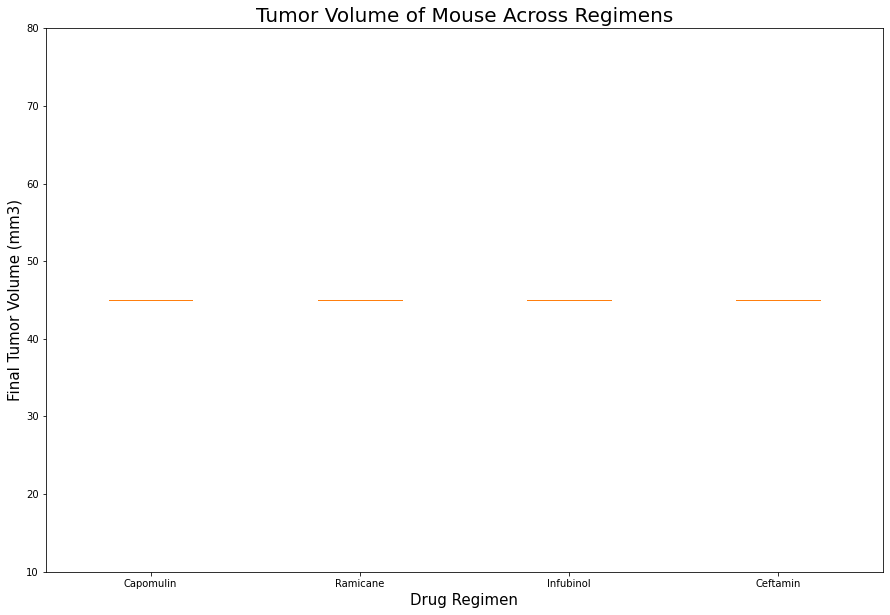

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ffig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume of Mouse Across Regimens',fontsize = 20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 15)
ax1.set_xlabel('Drug Regimen',fontsize = 15)
ax1.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, vert=True)

plt.ylim(10, 80)
plt.show()

Line and Scatter Plts

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.0,0
1,20,x401,Capomulin,Female,16,15,0,45.0,0
2,30,m601,Capomulin,Male,22,17,0,45.0,0
3,60,f966,Capomulin,Male,16,17,0,45.0,0
4,95,u364,Capomulin,Male,18,17,0,45.0,0


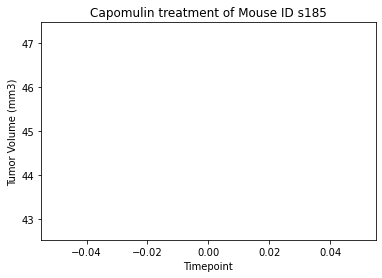

In [14]:
line_plot_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]


plt.plot(line_plot_mouse['Timepoint'],line_plot_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of Mouse ID s185')
plt.show()

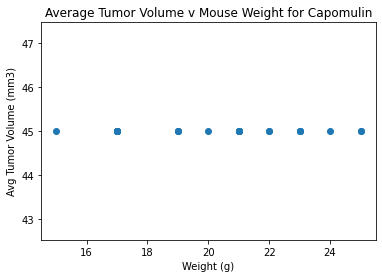

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.title('Average Tumor Volume v Mouse Weight for Capomulin')
plt.show()

Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

The correlation between mouse weight and average tumor volume is nan


In [17]:
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']

correg = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])



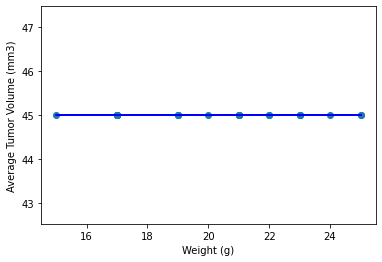

In [18]:
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_values,color="blue")

y_values = capomulin_avg['Weight (g)']*correg[0]+correg[1]
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()